In [1]:
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

import pandas_datareader as pdr


import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
from xgboost import XGBRegressor

## Data Visualization

In [3]:
def get_data(ticker):
    data = pdr.get_data_yahoo(ticker, start="2000-01-01").iloc[:-1][['Close']]
    data[f"{ticker}_return"] = np.log(data.Close) - np.log(data.Close).shift(1)
    data = data.dropna()
    data = data[[f"{ticker}_return"]]
    return data

In [4]:
ihsg = get_data('^JKSE').rename(columns = {'^JKSE_return':'IHSG'})
dow_jones = get_data('^DJI').rename(columns = {'^DJI_return':'dow_jones'})
SnP500 = get_data('^GSPC').rename(columns = {'^GSPC_return':'SnP500'})
nasdaq = get_data('^IXIC').rename(columns = {'^IXIC_return':'nasdaq'})
russell = get_data('^RUT').rename(columns = {'^RUT_return':'russell'})
dax = get_data('^GDAXI').rename(columns={'^GDAXI_return':'DAX'})
nikkei = get_data('^N225').rename(columns={'^N225_return':'nikkei'})
hang_seng = get_data('^HSI').rename(columns={'^HSI_return':'hangseng'})
nifty = get_data('^NSEI').rename(columns={'^NSEI_return':'Nifty50'})

In [5]:
df = ihsg.join(dow_jones).join(SnP500).join(nasdaq).join(russell).join(dax).join(nikkei).join(hang_seng).join(nifty)

In [6]:
df = df.dropna()

In [7]:
df.to_csv('data_saved/full_data.csv')

In [8]:
df.head()

IHSG  dow_jones    SnP500    nasdaq   russell       DAX  \
Date                                                                      
2007-09-18  0.007457   0.024757  0.028790  0.026753  0.038957  0.012668   
2007-09-19  0.032278   0.005529  0.006068  0.005573  0.013264  0.022920   
2007-09-20 -0.003771  -0.003543 -0.006746 -0.004582 -0.009391 -0.002034   
2007-09-21  0.013300   0.003878  0.004598  0.006358  0.004128  0.007642   
2007-09-25 -0.009935   0.001423 -0.000343  0.005793 -0.003481 -0.002376   

              nikkei  hangseng   Nifty50  
Date                                      
2007-09-18 -0.020397 -0.000915  0.011404  
2007-09-19  0.036031  0.039014  0.040130  
2007-09-20  0.001967  0.005716  0.003207  
2007-09-21 -0.006183  0.005535  0.018780  
2007-09-25  0.005448 -0.004592  0.001347

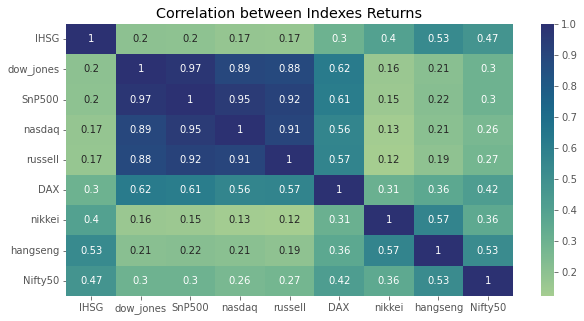

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(data=df.corr(), cmap='crest', annot=True)
ax.set_title('Correlation between Indexes Returns')

fig.savefig('pic/correlation.png')

## Split data

In [10]:
train = df.loc[df.index < '2018-01-01']
test = df.loc[df.index >= '2018-01-01']

In [11]:
X_train = train.drop(columns="IHSG")
y_train = train[['IHSG']]

In [12]:
X_test = test.drop(columns='IHSG')
y_test = test[['IHSG']]

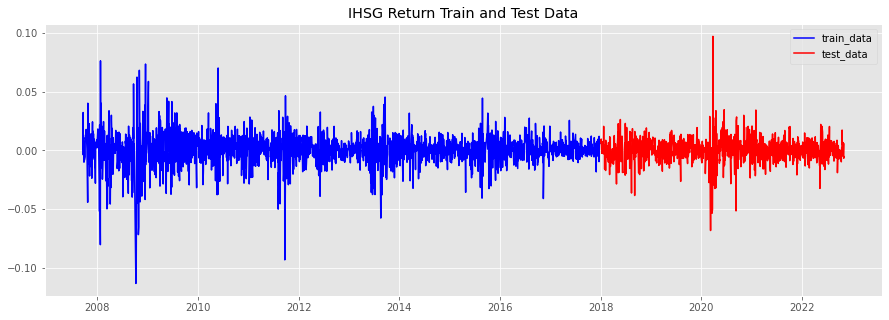

In [13]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(y_train, label="train_data", color="blue")
ax.plot(y_test, label="test_data", color="red")
ax.legend()
ax.set_title("IHSG Return Train and Test Data")

fig.savefig('pic/ihsg_return_train_test.png')

## Modelling

### XGB Regressor

In [14]:
model = XGBRegressor(n_estimators=500)

In [15]:
model.fit(X_train, 
          y_train, 
          eval_set = [(X_train, y_train), (X_test, y_test)]
         )

[0]	validation_0-rmse:0.35011	validation_1-rmse:0.35033
[1]	validation_0-rmse:0.24531	validation_1-rmse:0.24550
[2]	validation_0-rmse:0.17202	validation_1-rmse:0.17215
[3]	validation_0-rmse:0.12078	validation_1-rmse:0.12076
[4]	validation_0-rmse:0.08497	validation_1-rmse:0.08494
[5]	validation_0-rmse:0.06001	validation_1-rmse:0.06003
[6]	validation_0-rmse:0.04267	validation_1-rmse:0.04283
[7]	validation_0-rmse:0.03070	validation_1-rmse:0.03095
[8]	validation_0-rmse:0.02255	validation_1-rmse:0.02293
[9]	validation_0-rmse:0.01706	validation_1-rmse:0.01779
[10]	validation_0-rmse:0.01354	validation_1-rmse:0.01460
[11]	validation_0-rmse:0.01127	validation_1-rmse:0.01279
[12]	validation_0-rmse:0.00990	validation_1-rmse:0.01178
[13]	validation_0-rmse:0.00910	validation_1-rmse:0.01119
[14]	validation_0-rmse:0.00855	validation_1-rmse:0.01092
[15]	validation_0-rmse:0.00817	validation_1-rmse:0.01083
[16]	validation_0-rmse:0.00794	validation_1-rmse:0.01078
[17]	validation_0-rmse:0.00776	validation

[144]	validation_0-rmse:0.00135	validation_1-rmse:0.01141
[145]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[146]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[147]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[148]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[149]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[150]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[151]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[152]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[153]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[154]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[155]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[156]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[157]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[158]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[159]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[160]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[161]	validati

[286]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[287]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[288]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[289]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[290]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[291]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[292]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[293]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[294]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[295]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[296]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[297]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[298]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[299]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[300]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[301]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[302]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[303]	validati

[428]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[429]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[430]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[431]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[432]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[433]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[434]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[435]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[436]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[437]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[438]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[439]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[440]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[441]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[442]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[443]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[444]	validation_0-rmse:0.00135	validation_1-rmse:0.01142
[445]	validati

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## Feature Importance

In [16]:
fi = pd.DataFrame(data=model.feature_importances_, 
              index=model.feature_names_in_, 
              columns=['importance'])

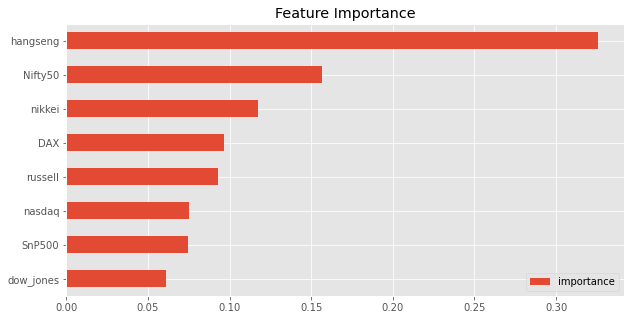

In [17]:
fi.sort_values('importance').plot(kind='barh', 
                                  title='Feature Importance', 
                                  figsize=(10, 5))

plt.savefig('pic/feature_importance.png')

## Forecast

In [18]:
test['prediction'] = model.predict(X_test)

C:\Users\fitra\AppData\Local\Temp\ipykernel_8156\3864373789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(X_test)


In [19]:
df = df.merge(test[['prediction']], how="left", left_index=True, right_index=True)

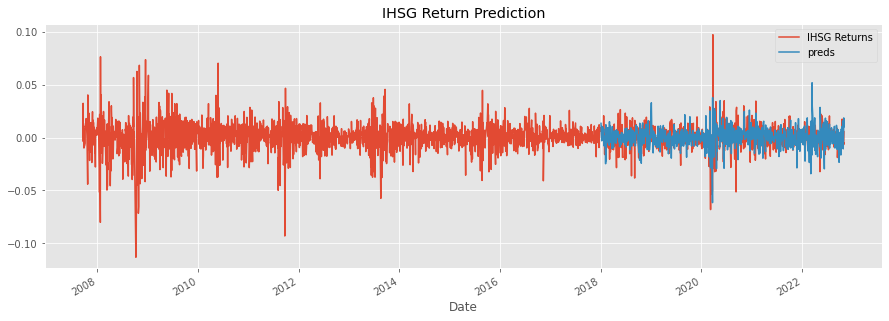

In [23]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df[['IHSG']], label = "IHSG Returns")
df['prediction'].plot(label="preds")

plt.legend()
plt.title("IHSG Return Prediction")

plt.savefig('pic/prediction.png')

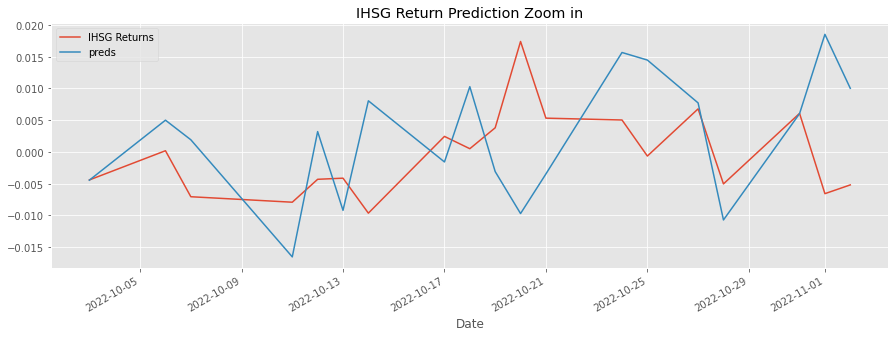

In [24]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(test[['IHSG']][test.index>'2022-10-01'], label="IHSG Returns")
df['prediction'][df.index>'2022-10-01'].plot(label="preds")

plt.legend()
plt.title("IHSG Return Prediction Zoom in")

fig.savefig('pic/prediction_zoom_in.png')